In [1]:
import numpy as np
import pandas as pd
import utils

import matplotlib.pyplot as plt 
import seaborn as sns
import seaborn.objects as so
# import plotnine as pn
# from plotnine import *



In [3]:
fn = utils.path_data / 'ana_three_dot_predicting_individual_beh_profile/prediction.csv'
df = pd.read_csv(fn)
df['accuracy'] = df['accuracy']=='correct'


df = df.rename(columns={'auc_pred_accuracy_target': 'Predicted accuracy'})
df = df.rename(columns={'accuracy': 'Ground true accuracy'})
df = df.rename(columns={'actual control': 'Degree of control'})
df = df.rename(columns={'angular bias': 'Rotation'})
df['Rotation'] = df['Rotation'].astype(str)
df.head()

,participant,trial no.,target dot,Degree of control,Rotation,selected dot,Ground true accuracy,group,auc_max,auc_prediction,...,auc_pred_accuracy,auc_pred_accuracy_h,auc_pred_accuracy_v,Predicted accuracy,auc_pred_accuracy_target_h,auc_pred_accuracy_target_v,argmin_ratio_pred_accuracy,argmin_ratio_pred_accuracy_target,topN_pred_accuracy,topN_pred_accuracy_target
0,K-Reg-H-10,1,2,0.30,0,1,False,H,0.605443,2,...,False,False,False,True,True,True,False,True,False,True
1,K-Reg-H-10,2,2,0.55,0,1,False,H,0.995729,2,...,False,False,False,True,True,True,False,True,False,True
2,K-Reg-H-10,3,3,0.30,90,1,False,H,0.696740,3,...,False,False,True,True,True,False,False,True,False,True
3,K-Reg-H-10,4,3,0.55,0,3,True,H,0.870278,3,...,True,True,True,True,True,True,True,True,True,True
4,K-Reg-H-10,5,3,0.30,90,3,True,H,0.666996,1,...,False,False,False,False,False,False,False,False,False,False


# Health

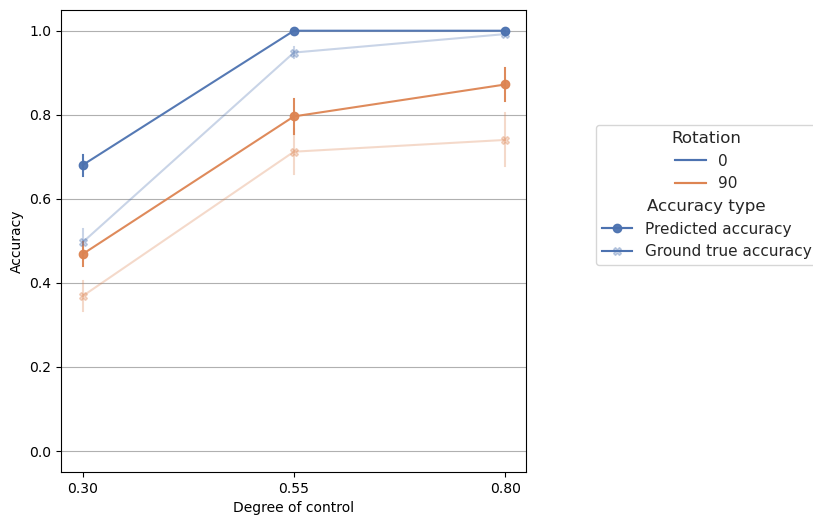

In [27]:
df_ = df.copy()
df_ = df_[['participant', 'Degree of control', 'Rotation', 'Predicted accuracy', 'group', 'Ground true accuracy']]
df_ = df_.groupby(['participant', 'Degree of control', 'Rotation', 'group']).mean()
df_ = df_.reset_index()
df_.head()
xtick = df_['Degree of control'].unique()

df_ = pd.melt(df_, id_vars=['participant', 'Degree of control', 'Rotation', 'group'], value_vars=['Predicted accuracy', 'Ground true accuracy'], var_name='Accuracy type', value_name='Accuracy')


# filter group=='H'
df_H = df_[df_['group']=='H']

# gather "Predicted Accuracy" and "Ground True Accuracy" into one column

# plot by seaborn object 

fig, ax = plt.subplots(figsize=(6,6))
plot = (
    so.Plot(df_H, x='Degree of control',  y='Accuracy', color='Rotation',  alpha='Accuracy type', marker='Accuracy type')
    # .facet("group")
    .theme(sns.axes_style("whitegrid"))
    .add(so.Range(), so.Est(errorbar="se"))
    .add(so.Line(), so.Agg())
    .scale(x=so.Continuous().tick(at=xtick))
    .limit(y=(-0.05, 1.05))
    .on(ax)
    # change size
)
plot.plot()
ax.grid(True, axis='y')
# sns.move_legend(ax, 'lower right')


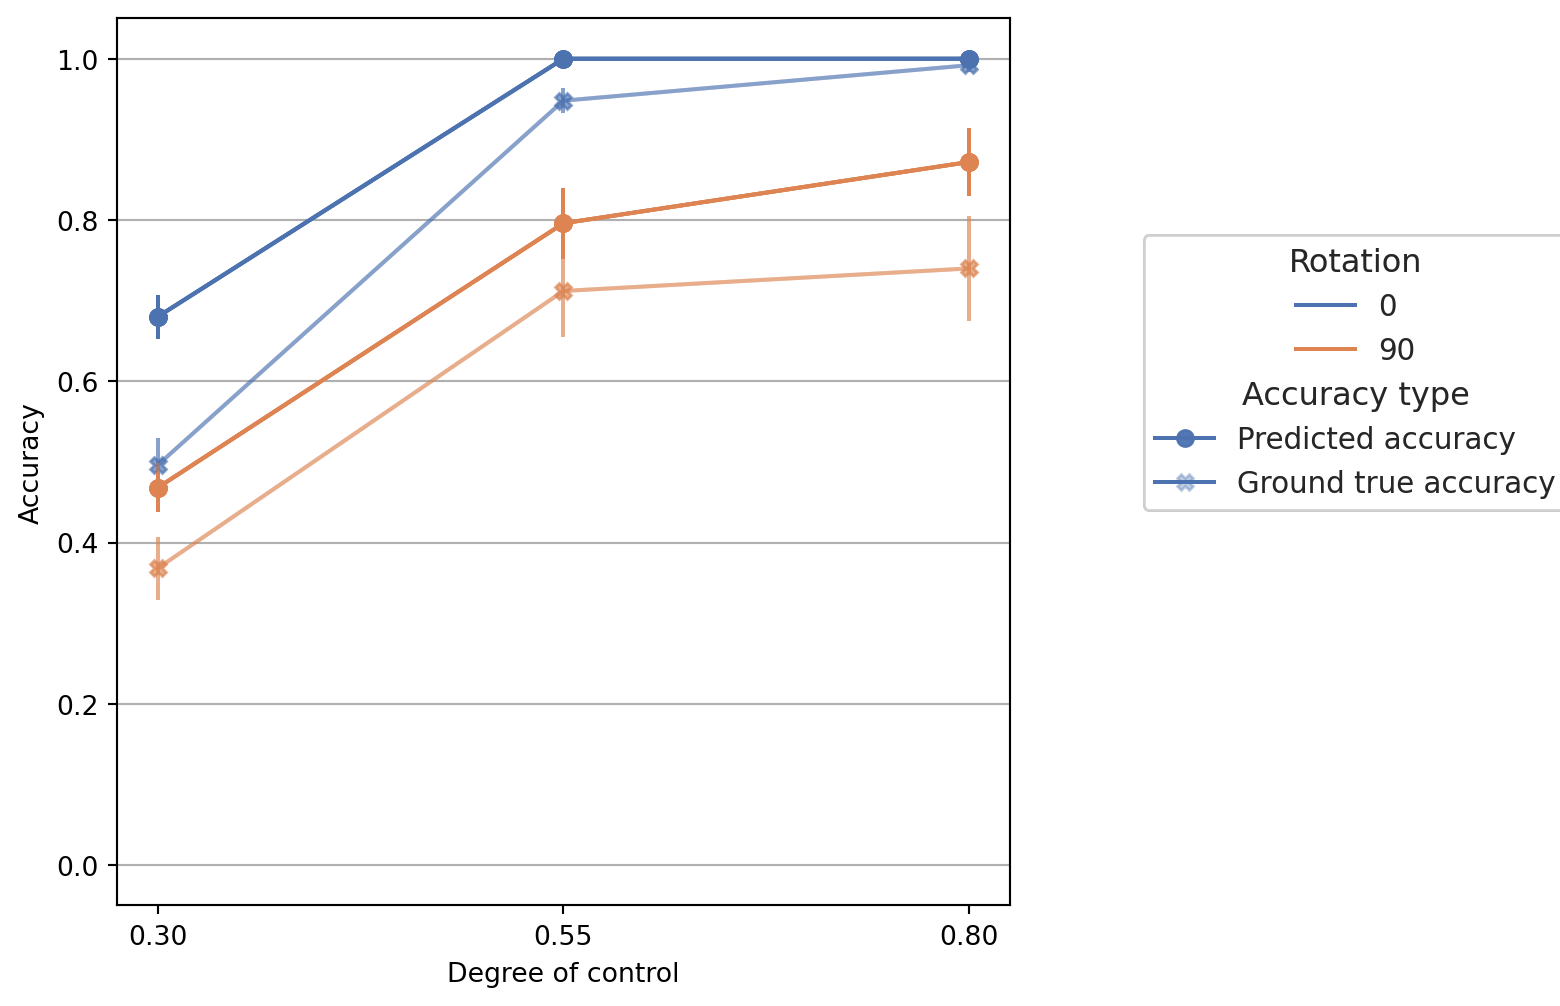

In [25]:
fn = utils.Save.savepath('ms_group_pred_vs_true', 'health.pdf')
plot.save(fn)

## Patient

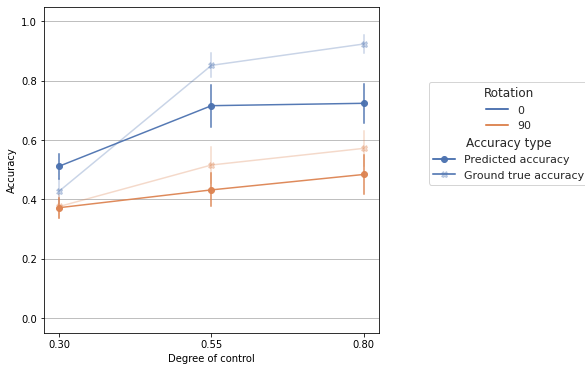

In [4]:
df_ = df.copy()
df_ = df_[['participant', 'Degree of control', 'Rotation', 'Predicted accuracy', 'group', 'Ground true accuracy']]
df_ = df_.groupby(['participant', 'Degree of control', 'Rotation', 'group']).mean()
df_ = df_.reset_index()
df_.head()
xtick = df_['Degree of control'].unique()

df_ = pd.melt(df_, id_vars=['participant', 'Degree of control', 'Rotation', 'group'], value_vars=['Predicted accuracy', 'Ground true accuracy'], var_name='Accuracy type', value_name='Accuracy')


# filter group=='H'
df_P = df_[df_['group']=='S']

# gather "Predicted Accuracy" and "Ground True Accuracy" into one column

# plot by seaborn object 

fig, ax = plt.subplots(figsize=(6,6))
plot = (
    so.Plot(df_P, x='Degree of control',  y='Accuracy', color='Rotation',  alpha='Accuracy type', marker='Accuracy type')
    # .facet("group")
    .theme(sns.axes_style("whitegrid"))
    .add(so.Range(), so.Est(errorbar="se"))
    .add(so.Line(), so.Agg())
    .scale(x=so.Continuous().tick(at=xtick))
    .limit(y=(-0.05, 1.05))
    .on(ax)
    # change size
)
plot.plot()
ax.grid(True, axis='y')
# sns.move_legend(ax, 'lower right')


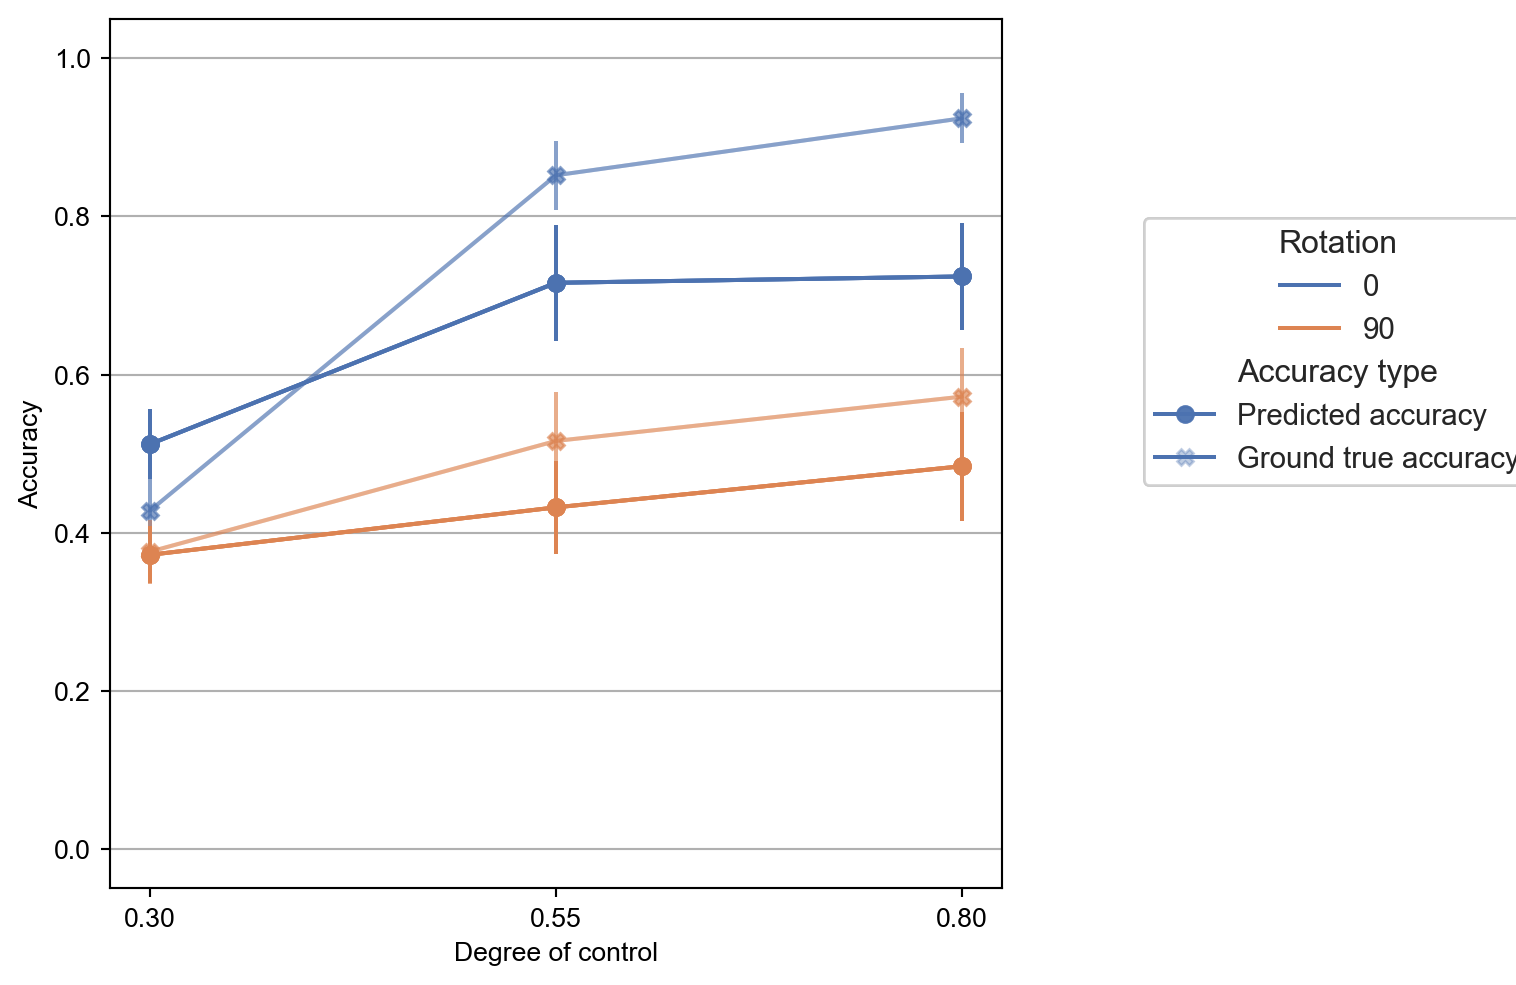

In [5]:
fn = utils.Save.savepath('ms_group_pred_vs_true', 'patient.pdf')
plot.save(fn)

## Action plan only

In [4]:
fn = utils.path_data / 'ana_three_dot_predicting_individual_beh_profile/prediction.csv'
df = pd.read_csv(fn)
df['accuracy'] = df['accuracy']=='correct'


df = df.rename(columns={'auc_pred_accuracy_target_h': 'Predicted accuracy'})
df = df.rename(columns={'accuracy': 'Ground true accuracy'})
df = df.rename(columns={'actual control': 'Degree of control'})
df = df.rename(columns={'angular bias': 'Rotation'})
df['Rotation'] = df['Rotation'].astype(str)
df.head()

,participant,trial no.,target dot,Degree of control,Rotation,selected dot,Ground true accuracy,group,auc_max,auc_prediction,...,auc_pred_accuracy,auc_pred_accuracy_h,auc_pred_accuracy_v,auc_pred_accuracy_target,Predicted accuracy,auc_pred_accuracy_target_v,argmin_ratio_pred_accuracy,argmin_ratio_pred_accuracy_target,topN_pred_accuracy,topN_pred_accuracy_target
0,K-Reg-H-10,1,2,0.30,0,1,False,H,0.605443,2,...,False,False,False,True,True,True,False,True,False,True
1,K-Reg-H-10,2,2,0.55,0,1,False,H,0.995729,2,...,False,False,False,True,True,True,False,True,False,True
2,K-Reg-H-10,3,3,0.30,90,1,False,H,0.696740,3,...,False,False,True,True,True,False,False,True,False,True
3,K-Reg-H-10,4,3,0.55,0,3,True,H,0.870278,3,...,True,True,True,True,True,True,True,True,True,True
4,K-Reg-H-10,5,3,0.30,90,3,True,H,0.666996,1,...,False,False,False,False,False,False,False,False,False,False


## Health

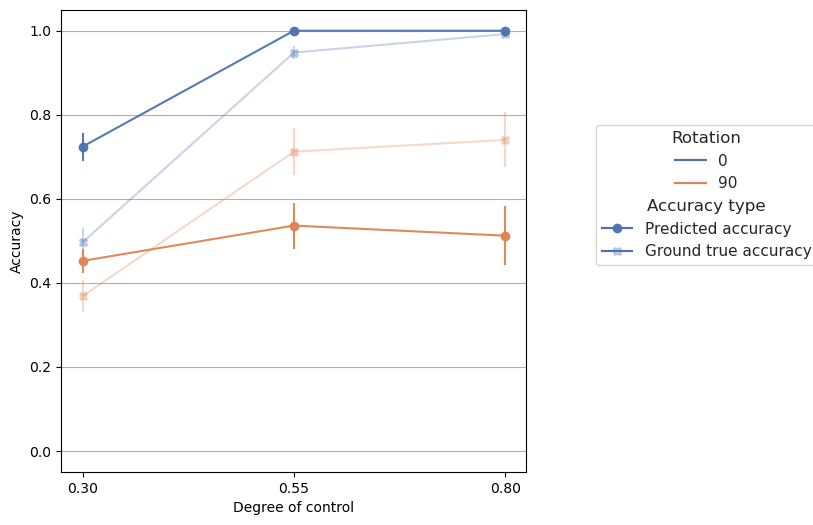

In [5]:
df_ = df.copy()
df_ = df_[['participant', 'Degree of control', 'Rotation', 'Predicted accuracy', 'group', 'Ground true accuracy']]
df_ = df_.groupby(['participant', 'Degree of control', 'Rotation', 'group']).mean()
df_ = df_.reset_index()
df_.head()
xtick = df_['Degree of control'].unique()

df_ = pd.melt(df_, id_vars=['participant', 'Degree of control', 'Rotation', 'group'], value_vars=['Predicted accuracy', 'Ground true accuracy'], var_name='Accuracy type', value_name='Accuracy')


# filter group=='H'
df_H = df_[df_['group']=='H']

# gather "Predicted Accuracy" and "Ground True Accuracy" into one column

# plot by seaborn object 

fig, ax = plt.subplots(figsize=(6,6))
plot = (
    so.Plot(df_H, x='Degree of control',  y='Accuracy', color='Rotation',  alpha='Accuracy type', marker='Accuracy type')
    # .facet("group")
    .theme(sns.axes_style("whitegrid"))
    .add(so.Range(), so.Est(errorbar="se"))
    .add(so.Line(), so.Agg())
    .scale(x=so.Continuous().tick(at=xtick))
    .limit(y=(-0.05, 1.05))
    .on(ax)
    # change size
)
plot.plot()
ax.grid(True, axis='y')
# sns.move_legend(ax, 'lower right')


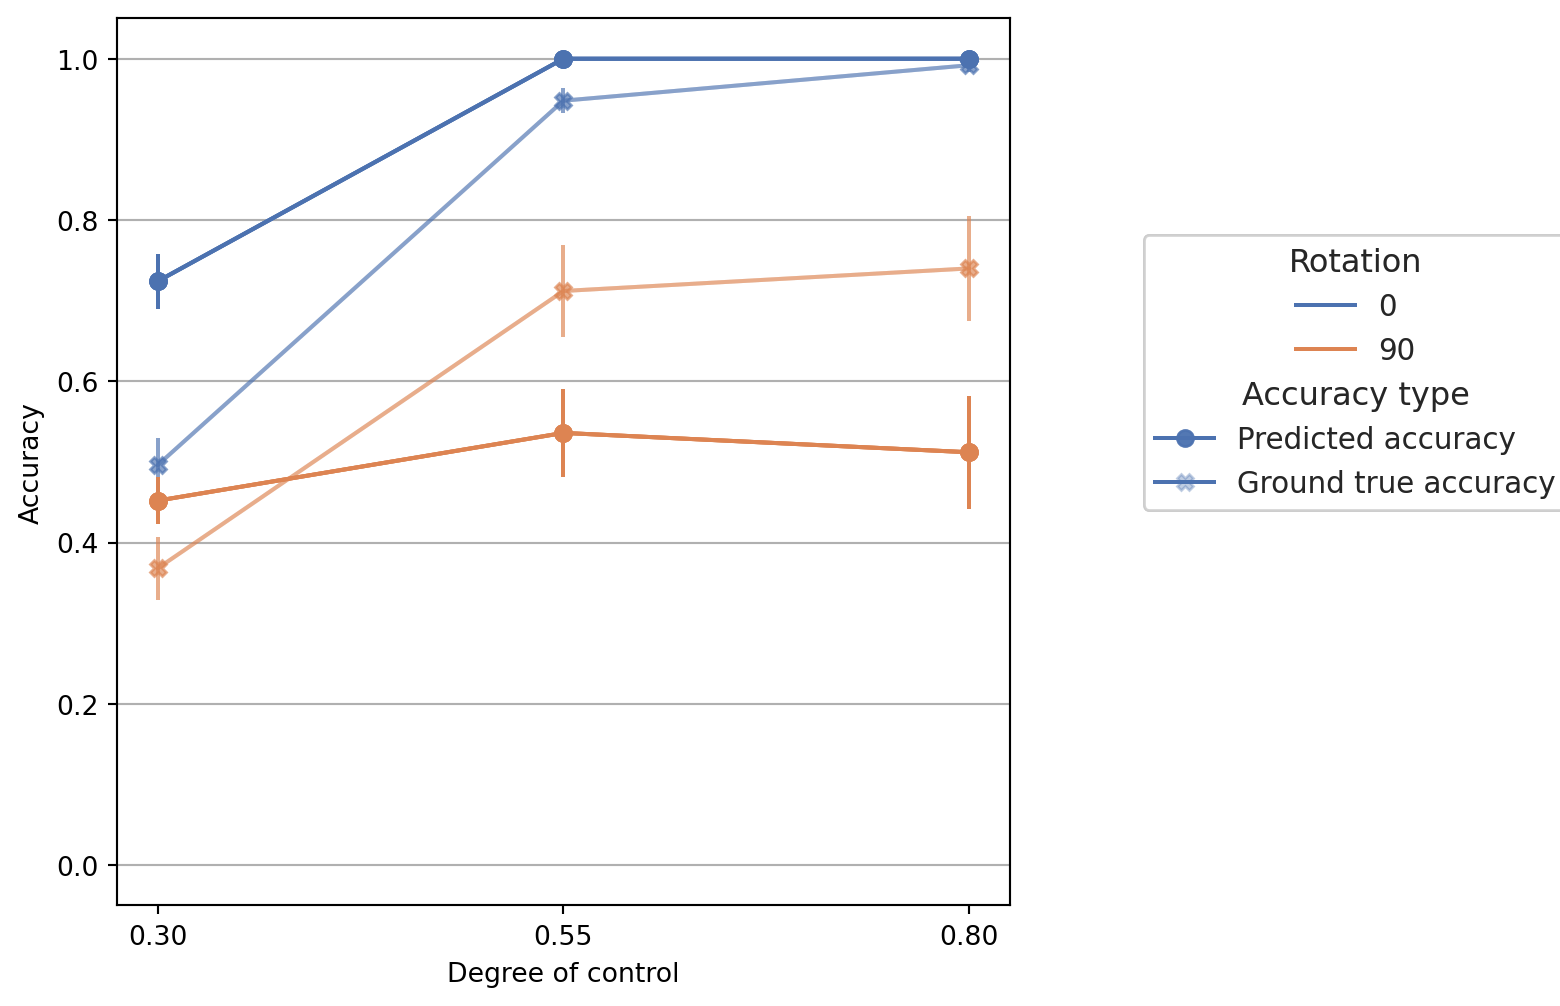

In [6]:
fn = utils.Save.savepath('ms_group_pred_vs_true', 'health_action_plan_only.pdf')
plot.save(fn)

# Prediction difference

In [7]:
fn = utils.path_data / 'ana_three_dot_predicting_individual_beh_profile/prediction.csv'
df = pd.read_csv(fn)
df['accuracy'] = df['accuracy']=='correct'


# df = df.rename(columns={'auc_pred_accuracy_target': 'Predicted accuracy'})
df = df.rename(columns={'accuracy': 'Ground true accuracy'})
df = df.rename(columns={'actual control': 'Degree of control'})
df = df.rename(columns={'angular bias': 'Rotation'})
df['Rotation'] = df['Rotation'].astype(str)
xtick = df['Degree of control'].unique()
df.head()

,participant,trial no.,target dot,Degree of control,Rotation,selected dot,Ground true accuracy,group,auc_max,auc_prediction,...,auc_pred_accuracy,auc_pred_accuracy_h,auc_pred_accuracy_v,auc_pred_accuracy_target,auc_pred_accuracy_target_h,auc_pred_accuracy_target_v,argmin_ratio_pred_accuracy,argmin_ratio_pred_accuracy_target,topN_pred_accuracy,topN_pred_accuracy_target
0,K-Reg-H-10,1,2,0.30,0,1,False,H,0.605443,2,...,False,False,False,True,True,True,False,True,False,True
1,K-Reg-H-10,2,2,0.55,0,1,False,H,0.995729,2,...,False,False,False,True,True,True,False,True,False,True
2,K-Reg-H-10,3,3,0.30,90,1,False,H,0.696740,3,...,False,False,True,True,True,False,False,True,False,True
3,K-Reg-H-10,4,3,0.55,0,3,True,H,0.870278,3,...,True,True,True,True,True,True,True,True,True,True
4,K-Reg-H-10,5,3,0.30,90,3,True,H,0.666996,1,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df_ = df.copy()
df_ = df_[['participant', 'Degree of control', 'Rotation', 'auc_pred_accuracy_target', 'auc_pred_accuracy_target_h', 'group', 'Ground true accuracy']]
df_ = df_.groupby(['participant', 'Degree of control', 'Rotation', 'group']).mean()
df_ = df_.reset_index()
df_['auc_pred_accuracy_target_diff_h'] = df_['auc_pred_accuracy_target'] - df_['auc_pred_accuracy_target_h']
df_['Ground true accuracy_diff_h'] = df_['auc_pred_accuracy_target_h'] - df_['Ground true accuracy']
df_.head()


,participant,Degree of control,Rotation,group,auc_pred_accuracy_target,auc_pred_accuracy_target_h,Ground true accuracy,auc_pred_accuracy_target_diff_h,Ground true accuracy_diff_h
0,K-Reg-H-10,0.30,0,H,0.5,0.4,0.3,0.1,0.1
1,K-Reg-H-10,0.30,90,H,0.6,0.5,0.6,0.1,-0.1
2,K-Reg-H-10,0.55,0,H,1.0,1.0,0.9,0.0,0.1
3,K-Reg-H-10,0.55,90,H,0.9,0.7,1.0,0.2,-0.3
4,K-Reg-H-10,0.80,0,H,1.0,1.0,1.0,0.0,0.0


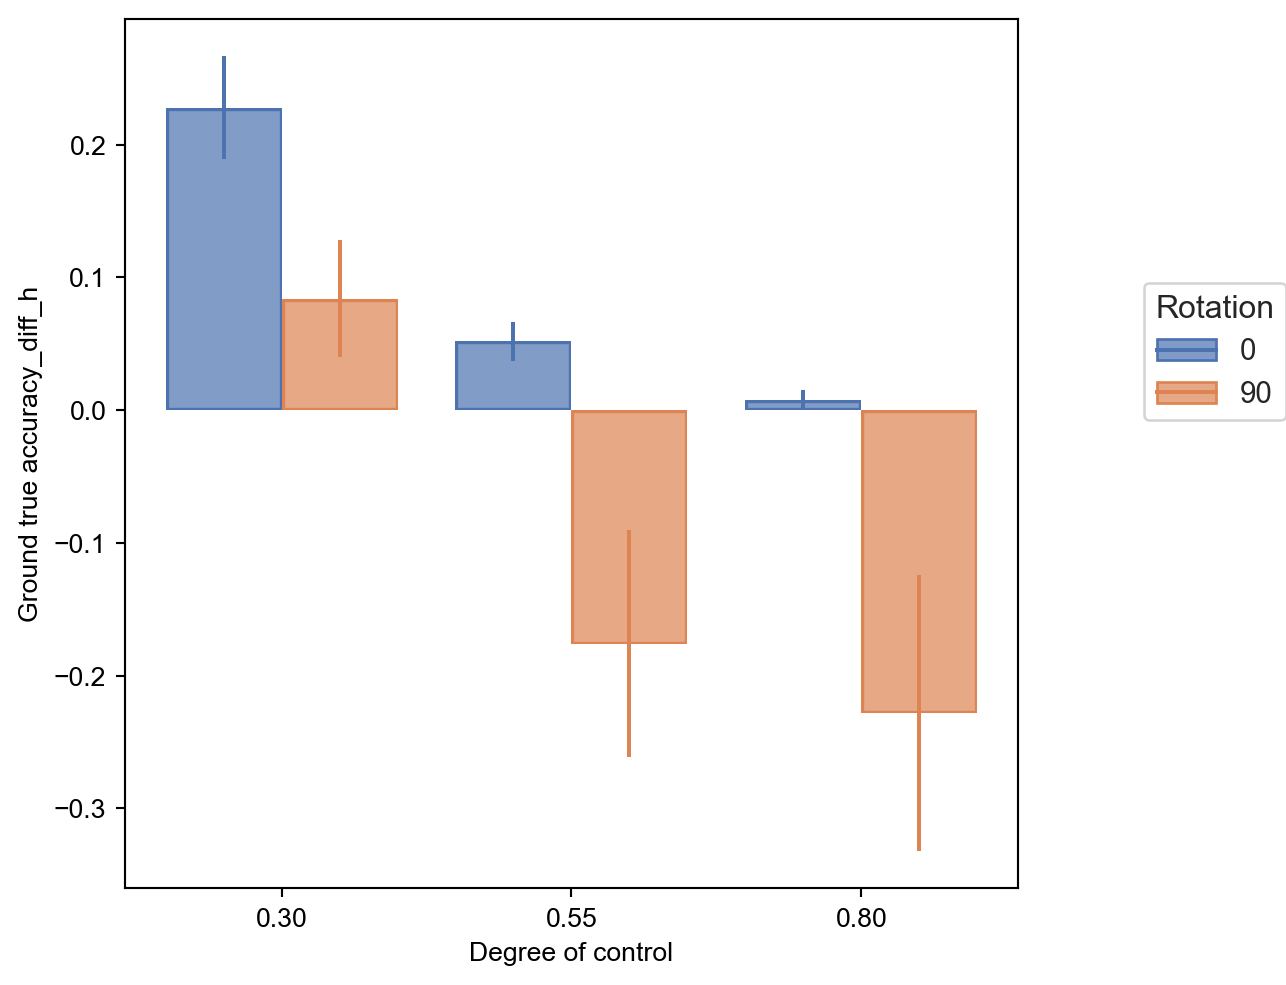

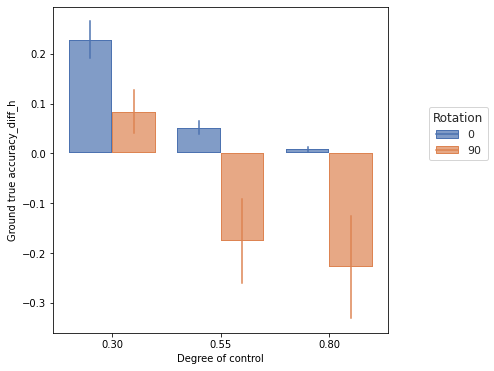

In [9]:
df_H = df_[df_['group']=='H']

fig, ax = plt.subplots(figsize=(6,6))
p = (
    so.Plot(df_H, x='Degree of control',  y='Ground true accuracy_diff_h', color='Rotation')
    # .facet("group")
    .theme(sns.axes_style("whitegrid"))
    .add(so.Range(), so.Est(errorbar="se"), so.Dodge())
    .add(so.Bar(), so.Agg(), so.Dodge())
    .scale(x=so.Continuous().tick(at=xtick))
    # .limit(y=(-0.05, 1.05))
    .on(ax)
    # change size
)

p.plot()


# Control judgement task

In [18]:
fn = utils.path_data / 'ana_one_dot_predicting_individual_beh_profile/prediction.csv'
df = pd.read_csv(fn)
# df['accuracy'] = df['accuracy']=='correct'


df = df.rename(columns={'response_pred_stdz': 'Predicted response'})
df = df.rename(columns={'response': 'Ground true response'})
df = df.rename(columns={'actual control': 'Degree of control'})
df = df.rename(columns={'angular bias': 'Rotation'})
df['Rotation'] = df['Rotation'].astype(str)
xtick = df['Degree of control'].unique()
df.head()

,participant,trial no.,Degree of control,Rotation,Ground true response,group,dist_mean,dist_sd,v_mean,v_sd,...,b1,b2,b0,Predicted response,b1_stdz,b2_stdz,b0_stdz,response_pred_p_only,b1_stdz_p_only,b0_stdz_p_only
0,K-Reg-H-10,1,0.30,0,0,H,0.637205,0.104790,0.167450,0.053875,...,-3.230715,-0.339573,1.976842,0,-2.694824,0.616395,-0.634225,0,-3.258059,1.941227
1,K-Reg-H-10,2,0.80,0,1,H,0.161334,0.040062,0.074640,0.066949,...,-3.230715,-0.339573,1.976842,1,-2.694824,0.616395,-0.634225,1,-3.258059,1.941227
2,K-Reg-H-10,3,0.30,0,0,H,0.677331,0.146095,0.194376,0.061812,...,-3.230715,-0.339573,1.976842,0,-2.694824,0.616395,-0.634225,0,-3.258059,1.941227
3,K-Reg-H-10,4,0.55,90,0,H,0.897086,0.210970,0.184965,0.064054,...,-3.230715,-0.339573,1.976842,0,-2.694824,0.616395,-0.634225,0,-3.258059,1.941227
4,K-Reg-H-10,5,0.30,90,0,H,0.949337,0.145878,0.229553,0.051487,...,-3.230715,-0.339573,1.976842,0,-2.694824,0.616395,-0.634225,0,-3.258059,1.941227


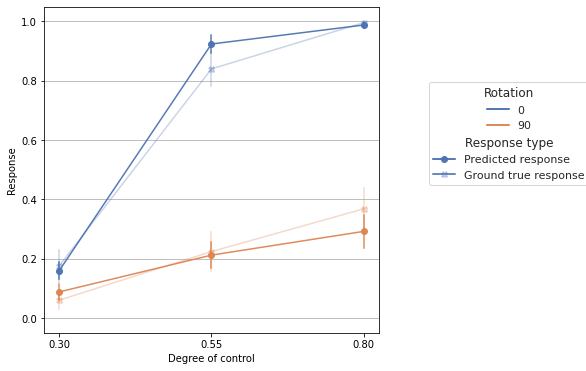

In [19]:
df_ = df.copy()
df_ = df_[['participant', 'Degree of control', 'Rotation', 'Predicted response', 'group', 'Ground true response']]
df_ = df_.groupby(['participant', 'Degree of control', 'Rotation', 'group']).mean()
df_ = df_.reset_index()
df_.head()
xtick = df_['Degree of control'].unique()

df_ = pd.melt(df_, id_vars=['participant', 'Degree of control', 'Rotation', 'group'], value_vars=['Predicted response', 'Ground true response'], var_name='Response type', value_name='Response')


# filter group=='H'
df_H = df_[df_['group']=='H']

# gather "Predicted Accuracy" and "Ground True Accuracy" into one column

# plot by seaborn object 

fig, ax = plt.subplots(figsize=(6,6))
plot = (
    so.Plot(df_H, x='Degree of control',  y='Response', color='Rotation',  alpha='Response type', marker='Response type')
    # .facet("group")
    .theme(sns.axes_style("whitegrid"))
    .add(so.Range(), so.Est(errorbar="se"))
    .add(so.Line(), so.Agg())
    .scale(x=so.Continuous().tick(at=xtick))
    .limit(y=(-0.05, 1.05))
    .on(ax)
    # change size
)
plot.plot()
ax.grid(True, axis='y')
# sns.move_legend(ax, 'lower right')


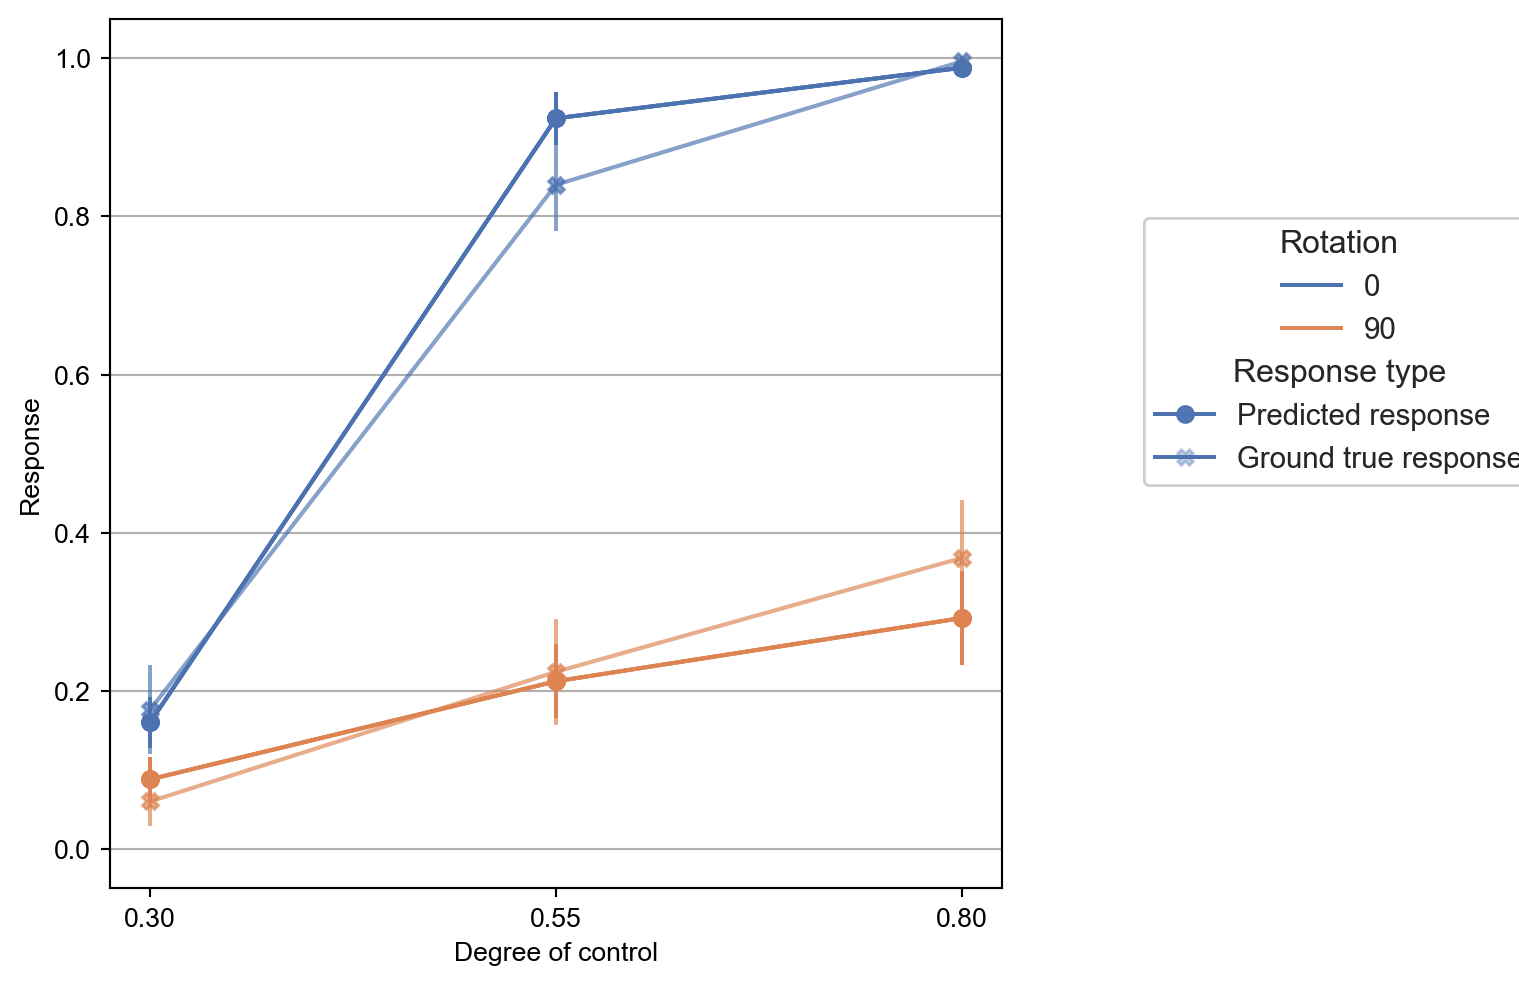

In [20]:
fn = utils.Save.savepath('ms_group_pred_vs_true', 'health_one_dot.pdf')
plot.save(fn)

In [6]:
fn = utils.path_data / 'ana_one_dot_predicting_individual_beh_profile/prediction.csv'
df = pd.read_csv(fn)
# df['accuracy'] = df['accuracy']=='correct'


df = df.rename(columns={'response_pred_stdz': 'Predicted response'})
df = df.rename(columns={'response': 'Ground true response'})
df = df.rename(columns={'actual control': 'Degree of control'})
df = df.rename(columns={'angular bias': 'Rotation'})
df['Rotation'] = df['Rotation'].astype(str)
xtick = df['Degree of control'].unique()
df.head()

,participant,trial no.,Degree of control,Rotation,Ground true response,group,dist_mean,dist_sd,v_mean,v_sd,...,b1,b2,b0,Predicted response,b1_stdz,b2_stdz,b0_stdz,response_pred_p_only,b1_stdz_p_only,b0_stdz_p_only
0,K-Reg-H-10,1,0.30,0,0,H,0.637205,0.104790,0.167450,0.053875,...,-3.230715,-0.339573,1.976842,0,-2.694824,0.616395,-0.634225,0,-3.258059,1.941227
1,K-Reg-H-10,2,0.80,0,1,H,0.161334,0.040062,0.074640,0.066949,...,-3.230715,-0.339573,1.976842,1,-2.694824,0.616395,-0.634225,1,-3.258059,1.941227
2,K-Reg-H-10,3,0.30,0,0,H,0.677331,0.146095,0.194376,0.061812,...,-3.230715,-0.339573,1.976842,0,-2.694824,0.616395,-0.634225,0,-3.258059,1.941227
3,K-Reg-H-10,4,0.55,90,0,H,0.897086,0.210970,0.184965,0.064054,...,-3.230715,-0.339573,1.976842,0,-2.694824,0.616395,-0.634225,0,-3.258059,1.941227
4,K-Reg-H-10,5,0.30,90,0,H,0.949337,0.145878,0.229553,0.051487,...,-3.230715,-0.339573,1.976842,0,-2.694824,0.616395,-0.634225,0,-3.258059,1.941227


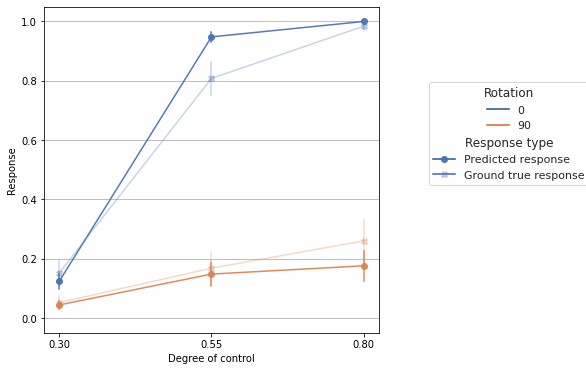

In [7]:
df_ = df.copy()
df_ = df_[['participant', 'Degree of control', 'Rotation', 'Predicted response', 'group', 'Ground true response']]
df_ = df_.groupby(['participant', 'Degree of control', 'Rotation', 'group']).mean()
df_ = df_.reset_index()
df_.head()
xtick = df_['Degree of control'].unique()

df_ = pd.melt(df_, id_vars=['participant', 'Degree of control', 'Rotation', 'group'], value_vars=['Predicted response', 'Ground true response'], var_name='Response type', value_name='Response')


# filter group=='H'
df_H = df_[df_['group']=='S']

# gather "Predicted Accuracy" and "Ground True Accuracy" into one column

# plot by seaborn object 

fig, ax = plt.subplots(figsize=(6,6))
plot = (
    so.Plot(df_H, x='Degree of control',  y='Response', color='Rotation',  alpha='Response type', marker='Response type')
    # .facet("group")
    .theme(sns.axes_style("whitegrid"))
    .add(so.Range(), so.Est(errorbar="se"))
    .add(so.Line(), so.Agg())
    .scale(x=so.Continuous().tick(at=xtick))
    .limit(y=(-0.05, 1.05))
    .on(ax)
    # change size
)
plot.plot()
ax.grid(True, axis='y')
# sns.move_legend(ax, 'lower right')


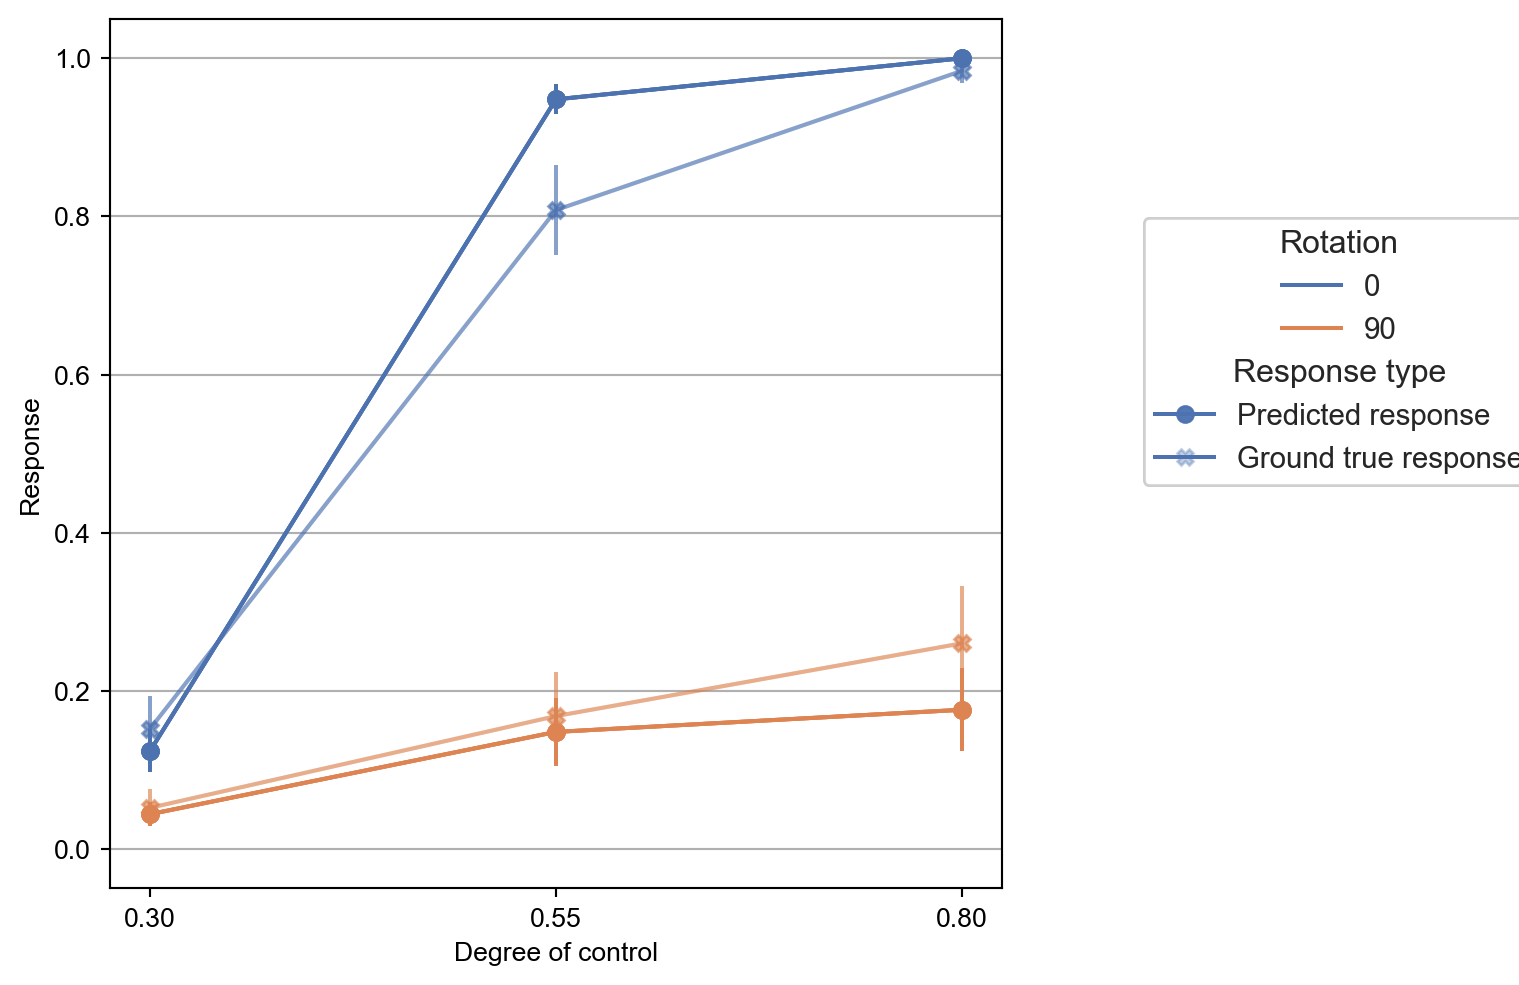

In [8]:
fn = utils.Save.savepath('ms_group_pred_vs_true', 'patient_one_dot.pdf')
plot.save(fn)

# Micro vs macro

3-dot

In [10]:
fn = utils.path_data / 'ana_three_dot_predicting_individual_beh_profile_cossmilarity/prediction.csv'
df = pd.read_csv(fn)
df['accuracy'] = df['accuracy']=='correct'


df = df.rename(columns={'auc_pred_accuracy_target': 'Predicted accuracy'})
df = df.rename(columns={'accuracy': 'Ground true accuracy'})
df = df.rename(columns={'actual control': 'Degree of control'})
df = df.rename(columns={'angular bias': 'Rotation'})
df['Rotation'] = df['Rotation'].astype(str)
xtick = df['Degree of control'].unique()
df.head()
df_micro = df.copy()

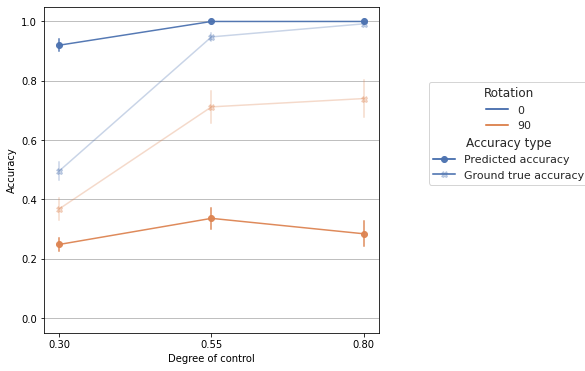

In [11]:
df_ = df.copy()
df_ = df_[['participant', 'Degree of control', 'Rotation', 'Predicted accuracy', 'group', 'Ground true accuracy']]
df_ = df_.groupby(['participant', 'Degree of control', 'Rotation', 'group']).mean()
df_ = df_.reset_index()
df_.head()
xtick = df_['Degree of control'].unique()

df_ = pd.melt(df_, id_vars=['participant', 'Degree of control', 'Rotation', 'group'], value_vars=['Predicted accuracy', 'Ground true accuracy'], var_name='Accuracy type', value_name='Accuracy')


# filter group=='H'
df_H = df_[df_['group']=='H']

# gather "Predicted Accuracy" and "Ground True Accuracy" into one column

# plot by seaborn object 

fig, ax = plt.subplots(figsize=(6,6))
plot = (
    so.Plot(df_H, x='Degree of control',  y='Accuracy', color='Rotation',  alpha='Accuracy type', marker='Accuracy type')
    # .facet("group")
    .theme(sns.axes_style("whitegrid"))
    .add(so.Range(), so.Est(errorbar="se"))
    .add(so.Line(), so.Agg())
    .scale(x=so.Continuous().tick(at=xtick))
    .limit(y=(-0.05, 1.05))
    .on(ax)
    # change size
)
plot.plot()
ax.grid(True, axis='y')
# sns.move_legend(ax, 'lower right')


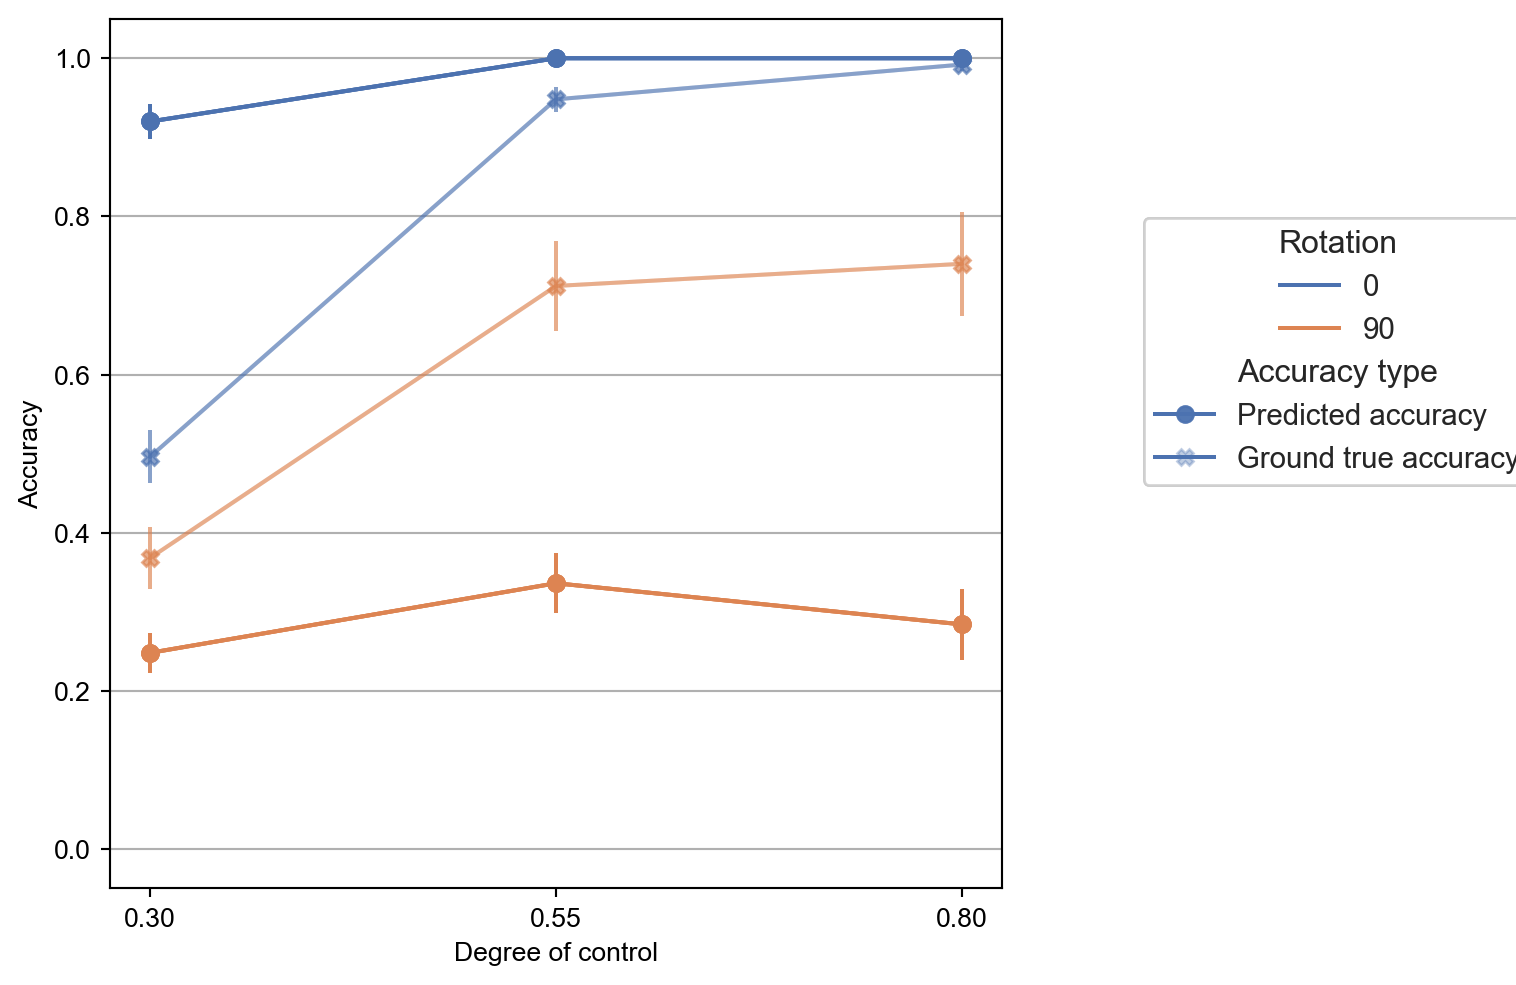

In [12]:
fn = utils.Save.savepath('ms_group_pred_vs_true', 'micro_3d_H.pdf')
plot.save(fn)

In [13]:
fn = utils.path_data / 'ana_one_dot_predicting_individual_beh_profile_cossmilarity/prediction.csv'
df = pd.read_csv(fn)
# df['accuracy'] = df['accuracy']=='correct'


df = df.rename(columns={'response_pred_stdz': 'Predicted response'})
df = df.rename(columns={'response': 'Ground true response'})
df = df.rename(columns={'actual control': 'Degree of control'})
df = df.rename(columns={'angular bias': 'Rotation'})
df['Rotation'] = df['Rotation'].astype(str)
xtick = df['Degree of control'].unique()
df.head()

,participant,trial no.,Degree of control,Rotation,Ground true response,group,dist_mean,dist_sd,v_mean,v_sd,...,b1,b2,b0,Predicted response,b1_stdz,b2_stdz,b0_stdz,response_pred_p_only,b1_stdz_p_only,b0_stdz_p_only
0,K-Reg-H-10,1,0.30,0,0,H,0.814116,0.797715,0.913790,0.736964,...,-3.44679,-1.133787,2.724355,0,-2.025295,-1.133769,-0.626027,0,-3.635382,1.83945
1,K-Reg-H-10,2,0.80,0,1,H,0.051420,0.154197,0.763800,0.818038,...,-3.44679,-1.133787,2.724355,1,-2.025295,-1.133769,-0.626027,1,-3.635382,1.83945
2,K-Reg-H-10,3,0.30,0,0,H,0.606636,0.576845,1.031310,0.690626,...,-3.44679,-1.133787,2.724355,0,-2.025295,-1.133769,-0.626027,0,-3.635382,1.83945
3,K-Reg-H-10,4,0.55,90,0,H,0.972314,0.794221,1.040956,0.807353,...,-3.44679,-1.133787,2.724355,0,-2.025295,-1.133769,-0.626027,0,-3.635382,1.83945
4,K-Reg-H-10,5,0.30,90,0,H,0.932129,0.663194,0.980944,0.668587,...,-3.44679,-1.133787,2.724355,0,-2.025295,-1.133769,-0.626027,0,-3.635382,1.83945


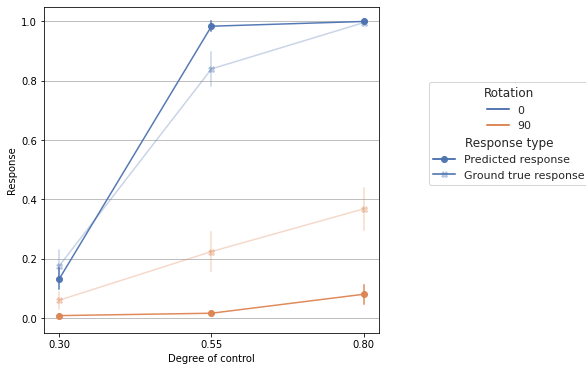

In [14]:
df_ = df.copy()
df_ = df_[['participant', 'Degree of control', 'Rotation', 'Predicted response', 'group', 'Ground true response']]
df_ = df_.groupby(['participant', 'Degree of control', 'Rotation', 'group']).mean()
df_ = df_.reset_index()
df_.head()
xtick = df_['Degree of control'].unique()

df_ = pd.melt(df_, id_vars=['participant', 'Degree of control', 'Rotation', 'group'], value_vars=['Predicted response', 'Ground true response'], var_name='Response type', value_name='Response')


# filter group=='H'
df_H = df_[df_['group']=='H']

# gather "Predicted Accuracy" and "Ground True Accuracy" into one column

# plot by seaborn object 

fig, ax = plt.subplots(figsize=(6,6))
plot = (
    so.Plot(df_H, x='Degree of control',  y='Response', color='Rotation',  alpha='Response type', marker='Response type')
    # .facet("group")
    .theme(sns.axes_style("whitegrid"))
    .add(so.Range(), so.Est(errorbar="se"))
    .add(so.Line(), so.Agg())
    .scale(x=so.Continuous().tick(at=xtick))
    .limit(y=(-0.05, 1.05))
    .on(ax)
    # change size
)
plot.plot()
ax.grid(True, axis='y')
# sns.move_legend(ax, 'lower right')


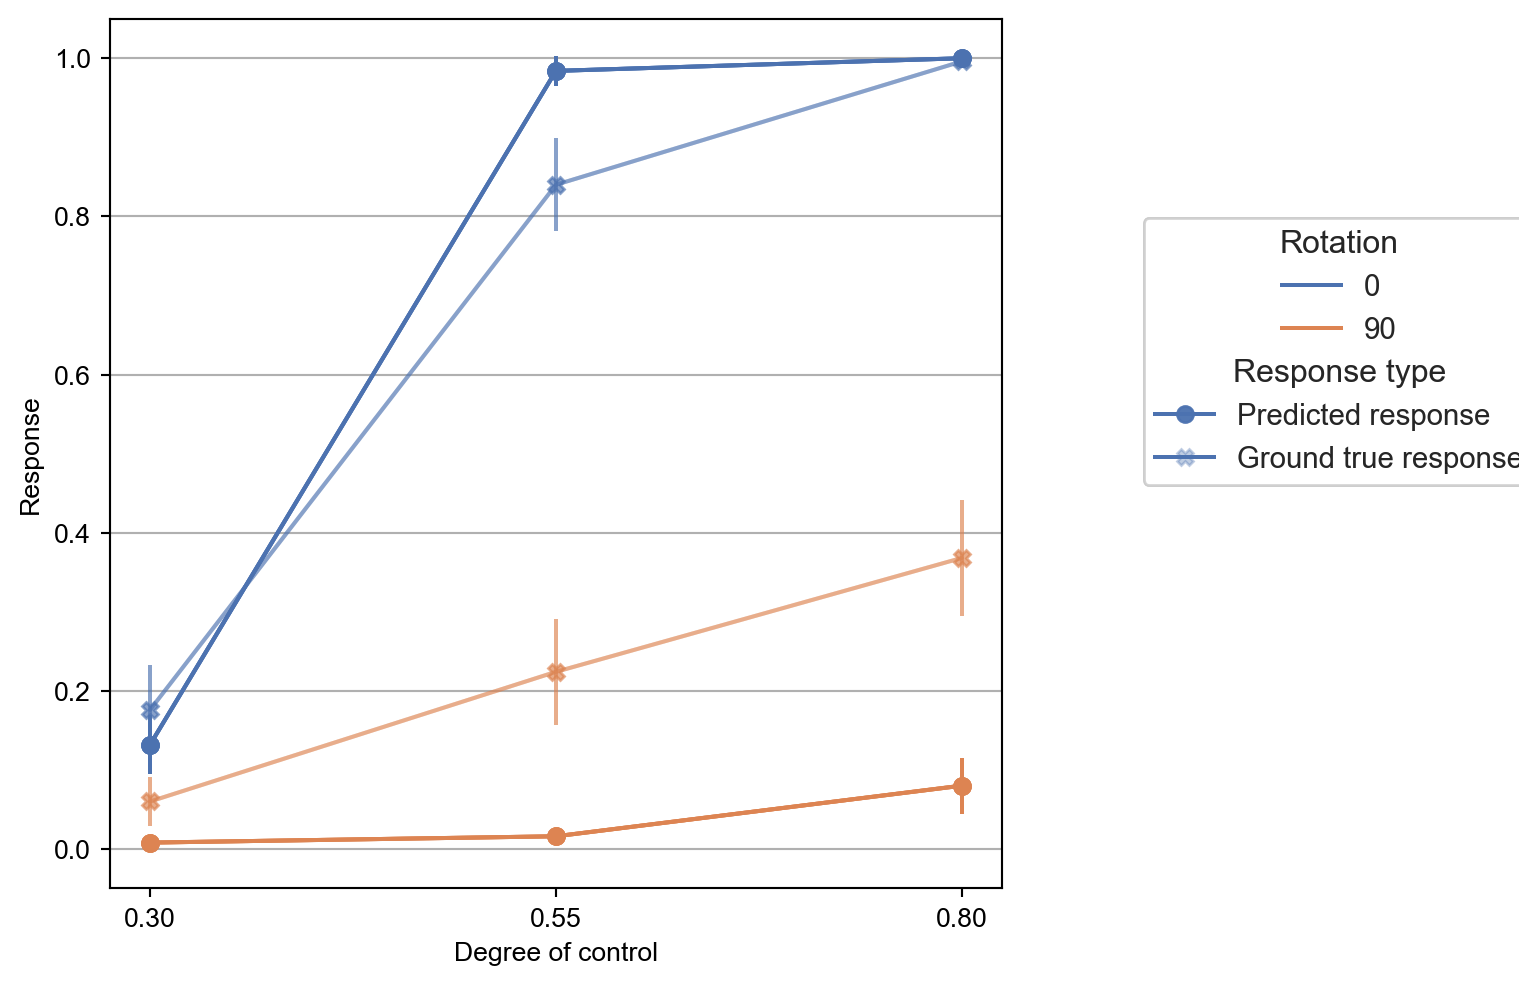

In [15]:
fn = utils.Save.savepath('ms_group_pred_vs_true', 'micro_1d_H.pdf')
plot.save(fn)